**LOADING THE DATA**

In [1]:
from google.colab import files
upload=files.upload()

Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t')

In [6]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [8]:
df.shape

(1000, 2)

In [10]:
df.isnull().sum()

,0
Review,0
Liked,0


In [9]:
df['Liked'].value_counts()

,count
Liked,
1,500
0,500


**PREPROCESSING**

In [11]:
df['char_count']=df['Review'].apply(len)

In [12]:
df.head()

,Review,Liked,char_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [13]:
df['word_count']=df['Review'].apply(lambda x:len(x.split()))

In [14]:
df.head()

,Review,Liked,char_count,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [20]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [21]:
df['sent_cnount']=df['Review'].apply(lambda x:len(nltk.sent_tokenize(str(x))))

In [22]:
df.head()

,Review,Liked,char_count,word_count,sent_cnount
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [24]:
df['Review'][3]

'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'

In [27]:
print("Avg character count for + ve review:")
df[df['Liked']==1]['char_count'].mean()

Avg character count for + ve review:


55.88

In [28]:
print("Avg character count for - ve review:")
df[df['Liked']==0]['char_count'].mean()

Avg character count for - ve review:


60.75

In [32]:
print("Avg word count for + ve review:")
df[df['Liked']==1]['word_count'].mean()

Avg word count for + ve review:


10.29

In [33]:
print("Avg word count for - ve review:")
df[df['Liked']==0]['word_count'].mean()

Avg word count for - ve review:


11.498

In [42]:
import re
from nltk.stem import PorterStemmer

In [44]:
custom_stopwords = {"is", "the", "in", "and", "to", "a", "of", "for", "on", "with", "at",
                    "shouldn't", "wouldn't", "couldn't", "won't", "can't", "isn't",
                    "aren't", "wasn't", "weren't", "doesn't", "don't", "didn't",
                    "hasn't", "haven't", "hadn't", "not", "no"}
corpus=[]
ps=PorterStemmer()
stp_words=set(stopwords.words('english'))-custom_stopwords
for i in range(len(df)):
  review=re.sub('[^a-zA-Z]',' ',df['Review'][i])
  review=review.lower()
  review=nltk.word_tokenize(review)
  review=[ps.stem(word) for word in review if word not in stp_words]
  review=' '.join(review)
  corpus.append(review)

In [45]:
df['processed_text']=corpus

In [46]:
df.head()

,Review,Liked,char_count,word_count,sent_cnount,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust is not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti and the textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop the late may bank holiday rick steve reco...
4,The selection on the menu was great and so wer...,1,59,12,1,the select on the menu great and the price


**WORD CLOUD**

In [47]:
from wordcloud import WordCloud

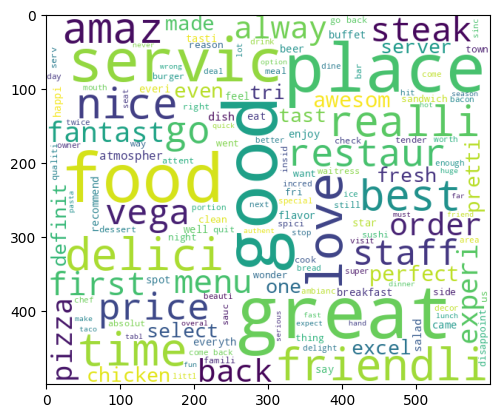

In [55]:
wc=WordCloud(width=600,height=500,min_font_size=10,max_font_size=100, background_color='white')
pos=wc.generate(df[df['Liked']==1]['processed_text'].str.cat(sep=" "))
plt.imshow(pos)
plt.show()

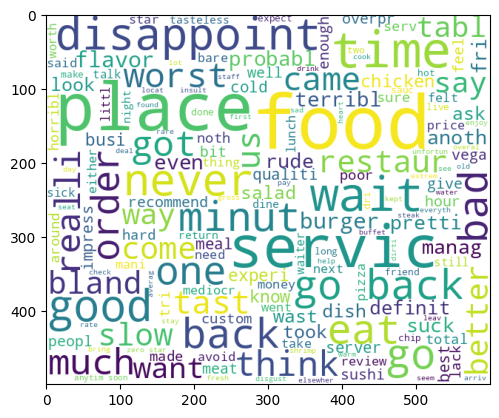

In [56]:
neg=wc.generate(df[df['Liked']==0]['processed_text'].str.cat(sep=" "))
plt.imshow(neg)
plt.show()

**CONVERTING TEXT TO NUMERICAL VALUE**

In [57]:
#countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(df['processed_text']).toarray()
y=df['Liked']

In [59]:
print(X.shape)
print(y.shape)

(1000, 1500)
(1000,)


**TRAIN-TEST-SPLIT**

In [61]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

**Model-1 [GaussianNB]**

In [86]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print('Accuracy is ',acc)

Accuracy is  0.685


**Model-2 [LogisticRegression]**

In [87]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print('Accuracy is ',acc)

Accuracy is  0.805


**Model-3 [RandomForest]**

In [88]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print('Accuracy is ',acc)

Accuracy is  0.82


**PREDICTION**

In [84]:
def predict(text):
  text_count=cv.transform([text])
  prediction=rf.predict(text_count)[0]
  if prediction == 1:
        return "Positive sentiment"
  else:
        return "Negative sentiment"

In [85]:
input="QUALITY OF SERVICE IS GOOD"
print(predict(input))

Positive sentiment


In [89]:
input="menu items are not that interesting"
print(predict(input))

Negative sentiment


In [91]:
import pickle
with open("sentiment_model.pkl", "wb") as file:
    pickle.dump(rf, file)

print("Model trained and saved as 'sentiment_model.pkl'")

Model trained and saved as 'sentiment_model.pkl'
